# 📊 Benchmark Visualization Dashboard
This notebook visualizes metrics collected from anomaly detection benchmark runs.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the cleaned benchmark metrics
df = pd.read_csv('benchmark_metrics_clean.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,test_case_id,device_type,csv_file,inference_time_ms,cpu_percent,memory_mb,disk_read_mb,disk_write_mb
0,2025-05-01 12:56:29.963104,1,motor_monitor,motor_monitor_0_unified.csv,3533.31,5.15,13624.68,0.0625,0.7539
1,2025-05-01 12:56:36.888401,1,bale_counter,bale_counter_0_unified.csv,6922.59,2.10,13702.41,0.0156,0.8242
2,2025-05-01 12:56:43.732273,1,output_sensor,output_sensor_0_unified.csv,6842.35,2.05,13670.56,0.0312,1.3164
3,2025-05-01 12:56:51.235347,1,temperature_sensor,temperature_sensor_0_unified.csv,7501.10,2.35,13828.19,2.2578,18.5547
4,2025-05-01 12:56:54.494801,1,motor_monitor,motor_monitor_0_unified.csv,3257.02,2.20,13834.81,0.0625,6.2070


## 📈 Group by Test Case and Device Type

In [7]:
grouped = df.groupby(['test_case_id', 'device_type']).agg({
    'inference_time_ms': ['mean', 'max', 'min', 'std'],
    'cpu_percent': ['mean', 'max', 'min', 'std'],
    'memory_mb': ['mean', 'max', 'min', 'std'],
    'disk_read_mb': ['mean'],
    'disk_write_mb': ['mean']
}).reset_index()
grouped.columns = ['_'.join(col).strip('_') for col in grouped.columns.values]
grouped.head()

,test_case_id,device_type,inference_time_ms_mean,inference_time_ms_max,inference_time_ms_min,inference_time_ms_std,cpu_percent_mean,cpu_percent_max,cpu_percent_min,cpu_percent_std,memory_mb_mean,memory_mb_max,memory_mb_min,memory_mb_std,disk_read_mb_mean,disk_write_mb_mean
0,1,bale_counter,7612.099000,8304.58,6896.20,299.891015,2.044167,7.40,1.55,0.730805,13915.644167,14064.05,13702.41,81.313020,0.161990,4.046680
1,1,motor_monitor,3346.527000,3628.81,3213.67,94.130884,2.866667,18.85,1.90,2.246592,13925.517167,14041.03,13624.68,84.493524,0.056898,1.604952
2,1,output_sensor,7379.901333,7973.78,6842.35,220.580730,1.936667,5.50,1.60,0.491699,13918.216333,14097.31,13670.56,91.253474,0.099928,3.094920
3,1,temperature_sensor,7395.371500,8380.01,7008.81,295.427222,2.053333,10.10,1.70,1.068179,13925.407333,14069.94,13761.35,80.235653,0.159138,3.224148
4,2,bale_counter,7855.282500,8402.41,7346.71,260.078648,1.863333,2.35,1.65,0.167955,14098.521333,14320.73,13824.36,121.663737,0.093980,3.428580


## 📊 Inference Time per Device Type

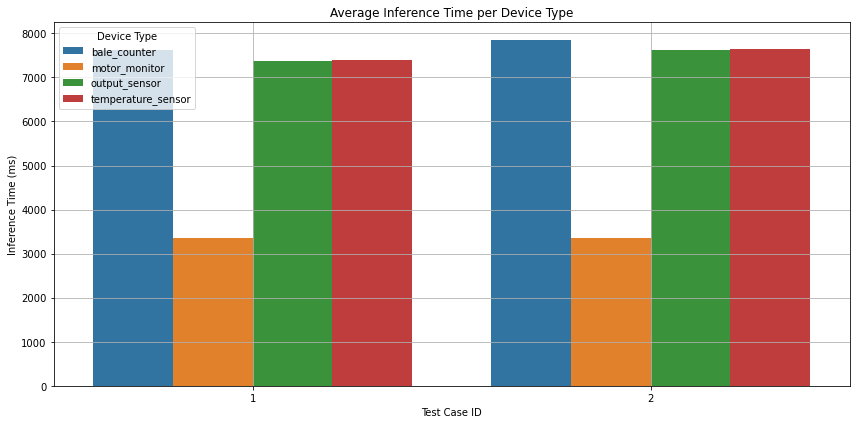

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='test_case_id', y='inference_time_ms_mean', hue='device_type')
plt.title('Average Inference Time per Device Type')
plt.ylabel('Inference Time (ms)')
plt.xlabel('Test Case ID')
plt.legend(title='Device Type')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 CPU and Memory Usage

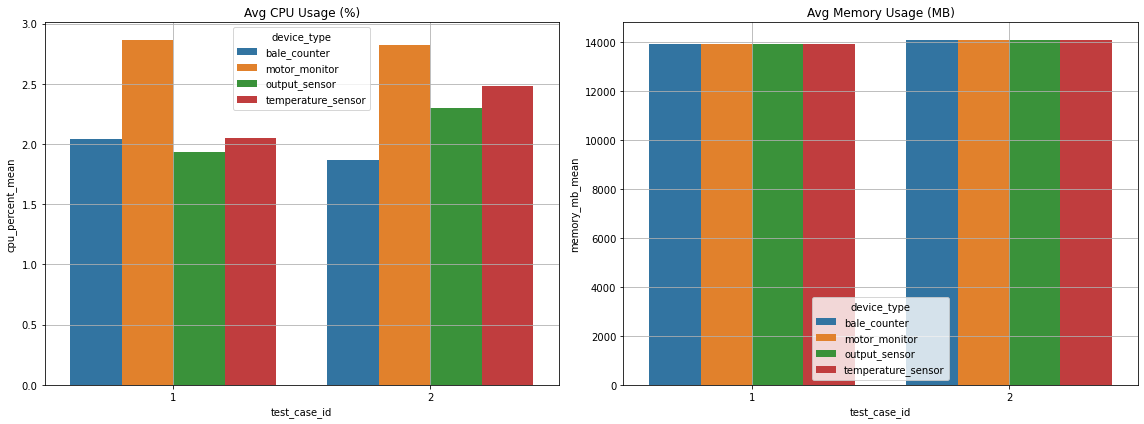

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(data=grouped, x='test_case_id', y='cpu_percent_mean', hue='device_type', ax=axes[0])
axes[0].set_title('Avg CPU Usage (%)')
axes[0].grid(True)
sns.barplot(data=grouped, x='test_case_id', y='memory_mb_mean', hue='device_type', ax=axes[1])
axes[1].set_title('Avg Memory Usage (MB)')
axes[1].grid(True)
plt.tight_layout()
plt.show()

## 💾 Disk Read/Write

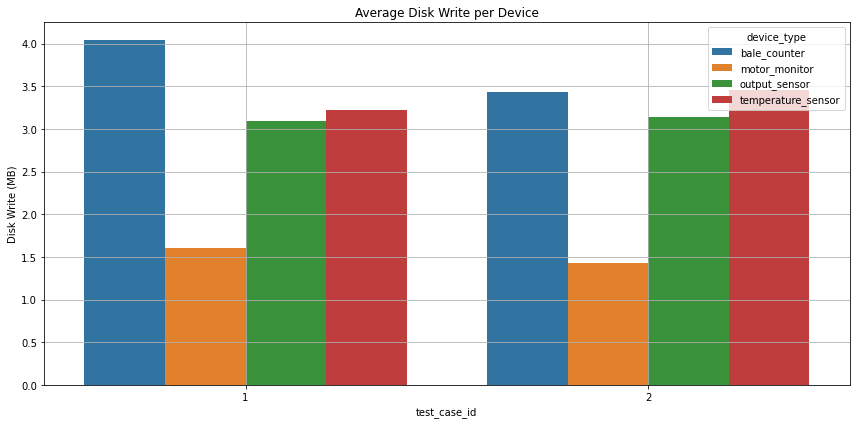

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='test_case_id', y='disk_write_mb_mean', hue='device_type')
plt.title('Average Disk Write per Device')
plt.ylabel('Disk Write (MB)')
plt.grid(True)
plt.tight_layout()
plt.show()